In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns

In [244]:
df = pd.read_csv("cStick.csv")
df.columns = ['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer','Decision']
y = df['Decision']
X = df
X = X.drop('Decision', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, y_train = make_classification(n_samples=len(X_train), n_features=6,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

clf = RandomForestClassifier(random_state=42, criterion='entropy')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6617647058823529


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


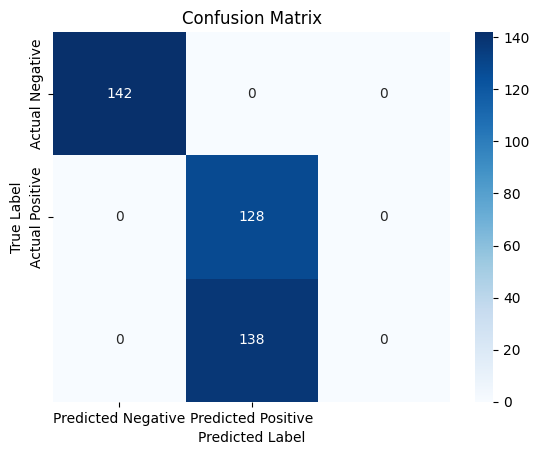

Accuracy: 0.66


In [245]:
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')